#### Data Preparation and Visualization

##### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Load the Canada Immigration Dataset

In [40]:
df_can = pd.read_excel(
    io='data/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2,
    engine='openpyxl'
)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


##### Rename Columns for Better Clarity

In [43]:
df_can.rename(columns={
    'OdName' : 'Country',
    'AreaName' : 'Continent',
    'RegName' : 'Region'
}, inplace=True)

#Set Country Column as Index
df_can.set_index('Country', inplace=True)

##### Transpose Top 5 Countries by Total Immigration

In [19]:
# Let's sort by total immigration to find top 5 countries
df_can['Total'] = df_can.loc[:, 1980:2013].sum(axis=1)
df_top5 = df_can.sort_values(by='Total', ascending=False).head(5)
df_top5 = df_top5.loc[:, 1980:2013].transpose()

##### Area Chart of Top 5 Immigrant Countries

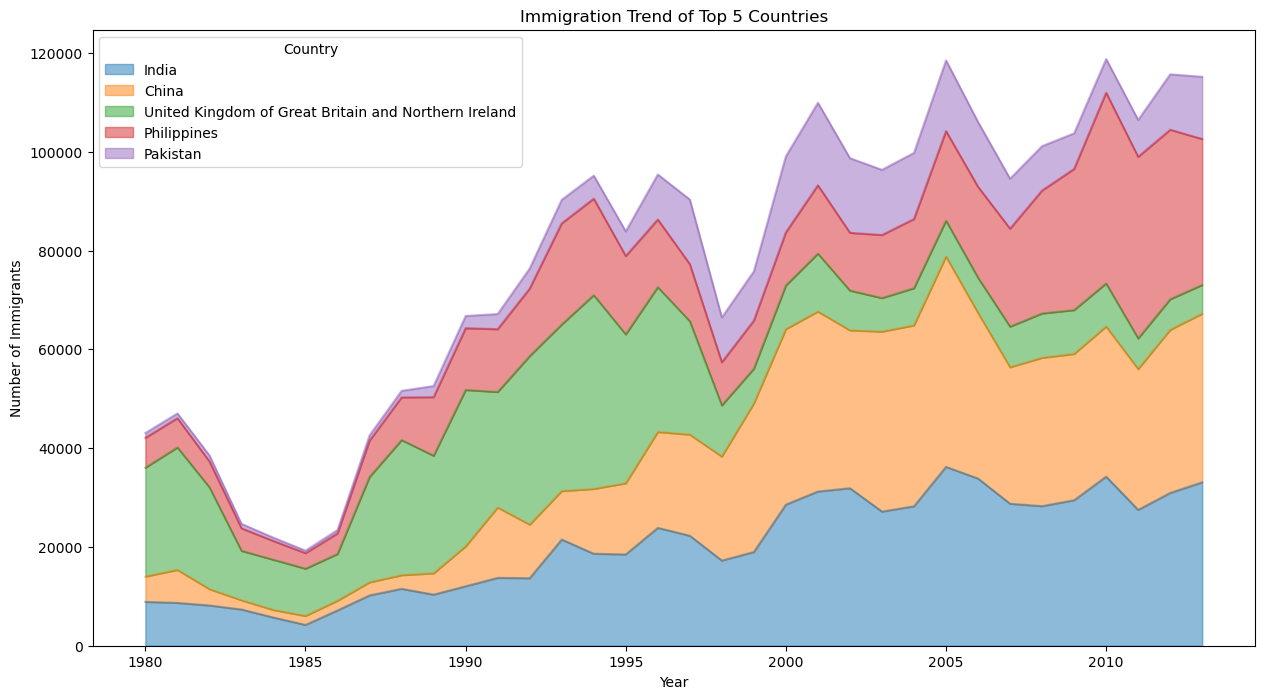

In [24]:
df_top5.plot(
    kind='area',
    figsize=(15, 8),
    stacked=True,
    alpha=0.5
)

plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.legend(title='Country')
plt.show()

##### Histogram: Immigrants in 2013

In [32]:
bin_edges = np.arange(0, df_can[2013].max()+1000, 500)

df_can[2013].plot(
    kind='hist',
    figsize=(15, 8),
    color='skyblue',
    bins=bin_edges
)

plt.title('Immigration from 195 Countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.grid()

##### Bar Chart: Iceland Immigration (1980–2013)

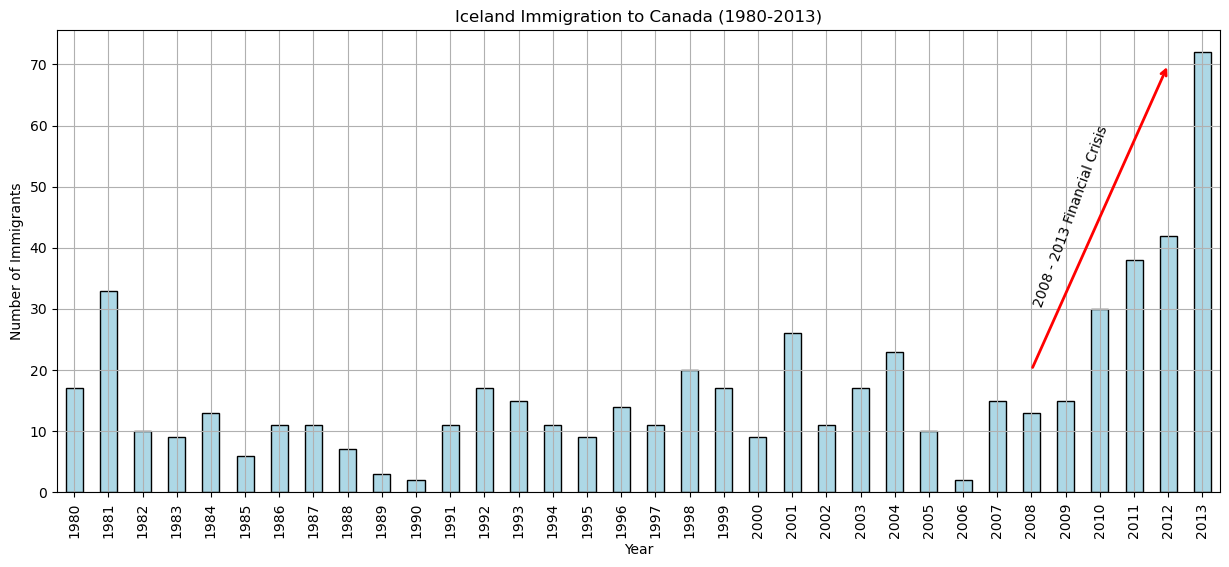

In [31]:
df_iceland = df_can.loc['Iceland', 1980:2013]

df_iceland.plot(
    kind='bar',
    figsize=(15, 6),
    color='lightblue',
    edgecolor='black'
)

plt.annotate(
    '', xy=(32,70), xytext=(28, 20),
    xycoords = 'data',
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
)

plt.annotate(
    '2008 - 2013 Financial Crisis',
    xy=(28,30),
    rotation=70,
    va='bottom',
    ha='left'
)

plt.title('Iceland Immigration to Canada (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.grid()
plt.show()

##### Pie Chart: Total Immigration by Continent

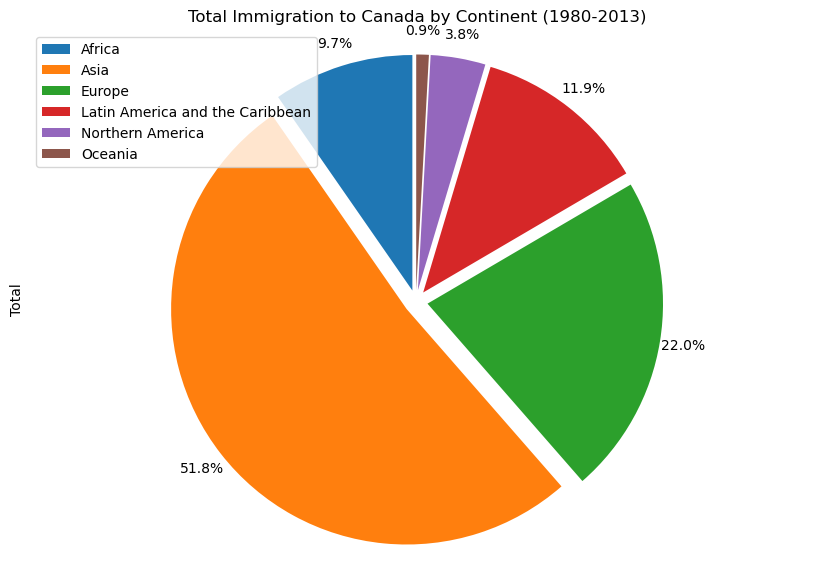

In [66]:
df_continent = df_can.groupby('Continent').sum()
df_continent['Total'] = df_continent.loc[:, 1980:2013].sum(axis=1)

df_continent['Total'].plot(
    kind='pie',
    figsize=(10, 7),
    autopct='%1.1f%%',
    shadow= False,
    startangle=90,
    labels=None,
    pctdistance=1.1,
    explode=[0.05] * df_continent.shape[0]
)

plt.title('Total Immigration to Canada by Continent (1980-2013)')
plt.axis('equal')
plt.legend(labels=df_continent.index, loc='upper left')
plt.show()